# Programming for Data Analytics Final Project: Wind

### Author: Aoife Flavin

Put a description of what the project is for here

with a view to windfarms!!


Description of the dataset

I want to build a windfarm in Cork. I am looking at 3 potentila locations for the windfarm:
1. Sherkin Island 
2. Cork Airport
3. Moore Park

I will compare the windpower in the past 5 years in these locations and then decide on one location to host my windfarm. On my chosen location I will do further analysis on what is the best approach to seting up my windfarm.

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import linregress


In [29]:
# Function to load and clean a dataset
def load_and_clean_data(file_path, skiprows, column_names, numeric_columns):
    df = pd.read_csv(file_path, skiprows=skiprows, dtype=str, low_memory=False)
    
    df.columns = column_names
    
    # keep only relevant columns
    df = df.iloc[:, :len(column_names)]
    
    # Convert to float
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    
    # datetime
    df["Date and Time (UTC)"] = pd.to_datetime(
        df["Date and Time (UTC)"], 
        format="%d-%b-%Y %H:%M", 
        errors="coerce"
    )
    
    # drop rows with invalid dates
    df.dropna(subset=["Date and Time (UTC)"], inplace=True)
    
    # Drop nan values
    df.dropna(how="all", inplace=True)
    
    return df

# Sherkin Island 
sherkin_column_names = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)"
]
sherkin_numeric_columns = [
    "Precipitation Amount (mm)",
    "Air Temperature (C)",
    "Wet Bulb Temperature (C)",
    "Dew Point Temperature (C)",
    "Vapour Pressure (hPa)",
    "Relative Humidity (%)",
    "Mean Sea Level Pressure (hPa)",
    "Mean Wind Speed (knot)",
    "Predominant Wind Direction (degree)"
]
df = load_and_clean_data('sherkin_island_weather.csv', skiprows=17, 
                         column_names=sherkin_column_names, 
                         numeric_columns=sherkin_numeric_columns)

# Cork Airport 
cork_column_names = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)", "Synop code for Present Weather", "Synop code for Past Weather", 
    "Sunshine duration (hours)", "Visibility (m)", "Cloud height (100's of ft)", "Cloud amount"
]
cork_numeric_columns = [
    "Precipitation Amount (mm)",
    "Air Temperature (C)",
    "Wet Bulb Temperature (C)",
    "Dew Point Temperature (C)",
    "Vapour Pressure (hPa)",
    "Relative Humidity (%)",
    "Mean Sea Level Pressure (hPa)",
    "Mean Wind Speed (knot)",
    "Predominant Wind Direction (degree)"
    "Sunshine duration (hours)"
    "Visibility (m)"
    "Cloud height (100's of ft)"
    "Cloud amount"
]
ca_df = load_and_clean_data('cork_airport_weather.csv', skiprows=23, 
                            column_names=cork_column_names, 
                            numeric_columns=cork_numeric_columns)

# Moore Park 
moore_column_names = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)"
]
moore_numeric_columns = [
    "Precipitation Amount (mm)",
    "Air Temperature (C)",
    "Wet Bulb Temperature (C)",
    "Dew Point Temperature (C)",
    "Vapour Pressure (hPa)",
    "Relative Humidity (%)",
    "Mean Sea Level Pressure (hPa)",
    "Mean Wind Speed (knot)",
    "Predominant Wind Direction (degree)"
]
mp_df = load_and_clean_data('moore_park_weather.csv', skiprows=17, 
                            column_names=moore_column_names, 
                            numeric_columns=moore_numeric_columns)



I began by loading in the dataset and taking a look at the first few rows of data.

In [2]:
df = pd.read_csv(
    'sherkin_island_weather.csv', skiprows=17, dtype=str, low_memory=False)

print(df.columns)
#https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


I then renamed the columns

In [3]:
df.columns = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)"
]
df = df.iloc[:, :15]  # keep first 15 columns
new_column_names = df.columns


#https://www.datacamp.com/tutorial/loc-vs-iloc

In [4]:
numeric_columns = [
    "Precipitation Amount (mm)",
    "Air Temperature (C)",
    "Wet Bulb Temperature (C)",
    "Dew Point Temperature (C)",
    "Vapour Pressure (hPa)",
    "Relative Humidity (%)",
    "Mean Sea Level Pressure (hPa)",
    "Mean Wind Speed (knot)",
    "Predominant Wind Direction (degree)"
]

# convert to float 
for col in numeric_columns:
    if col in df.columns:  
        df[col] = pd.to_numeric(df[col], errors="coerce")  # convert invalid columns to Nan

In [5]:
# date time formatting
df["Date and Time (UTC)"] = pd.to_datetime(
    df["Date and Time (UTC)"], 
    format="%d-%b-%Y %H:%M",  
    errors="coerce"  
)

# get rid of rows with invalid dates
df.dropna(subset=["Date and Time (UTC)"], inplace=True)

#https://www.w3schools.com/python/pandas/pandas_cleaning_wrong_format.asp

Clean the data

In [6]:
df.dropna(how="all", inplace=True)


#https://www.w3schools.com/python/pandas/ref_df_dropna.asp

Plots I could do:
- Summary Statistics: Compute mean, median, variance, and standard deviation for each weather variable (e.g., temperature, humidity, wind speed).
- Seasonal Patterns: Plot time series to observe daily or seasonal trends.
- Windspeed over a single day / week / year
- Max windspeed over time
- Heatwaves/Cold Spells: Detect extended periods of high or low temperatures.
- Storm Events: Identify periods with unusually high wind speeds or rainfall
- Heatmaps: Use heatmaps for hourly or daily patterns (e.g., temperature across the hours of the day over a month).
- Variable Interdependence: Explore how variables like temperature, humidity, and wind speed correlate.
- Trend Analysis: Identify long-term trends in temperature, precipitation, or wind speed over the period of data collection.
- Machine Learning Models: Use regression or classification models to predict specific outcomes, like rainfall.

In [7]:
#Find out what data types each variable is
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180480 entries, 0 to 180479
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Date and Time (UTC)                  180480 non-null  datetime64[ns]
 1   Indicator 1                          180480 non-null  object        
 2   Precipitation Amount (mm)            180076 non-null  float64       
 3   Indicator 2                          180480 non-null  object        
 4   Air Temperature (C)                  180084 non-null  float64       
 5   Indicator 3                          180480 non-null  object        
 6   Wet Bulb Temperature (C)             180025 non-null  float64       
 7   Dew Point Temperature (C)            180025 non-null  float64       
 8   Vapour Pressure (hPa)                180025 non-null  float64       
 9   Relative Humidity (%)                180027 non-null  float64       
 

In [8]:
#Create a column for date and month
df["Month"] = df["Date and Time (UTC)"].dt.month
df["Date"] = df["Date and Time (UTC)"].dt.date

In [9]:
# Filter data for winter (Nov-Jan) and summer (May-Jul)
winter_months = [11, 12, 1]
summer_months = [5, 6, 7]


# filter winter and summer data
winter_data = df[df["Month"].isin(winter_months)]
summer_data = df[df["Month"].isin(summer_months)]

# create function for summary stats
def compute_summary_statistics(data, variable_name):
    stats = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Variance": np.var(data),
        "Standard Deviation": np.std(data)
    }
    return stats

# calculate winter stats
winter_stats = {
    "Temperature (C)": compute_summary_statistics(winter_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(winter_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(winter_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# calculate summer stats
summer_stats = {
    "Temperature (C)": compute_summary_statistics(summer_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(summer_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(summer_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# Display results
print("Winter Summary Statistics:")
for variable, stats in winter_stats.items():
    print(f"{variable}: {stats}")

print("\nSummer Summary Statistics:")
for variable, stats in summer_stats.items():
    print(f"{variable}: {stats}")

Winter Summary Statistics:
Temperature (C): {'Mean': 8.820644354081951, 'Median': nan, 'Variance': 7.786784588605971, 'Standard Deviation': 2.790481067594971}
Humidity (%): {'Mean': 83.7321983848236, 'Median': nan, 'Variance': 109.27413585521282, 'Standard Deviation': 10.453426990954345}
Wind Speed (knot): {'Mean': 14.490671850213374, 'Median': nan, 'Variance': 59.11297351246378, 'Standard Deviation': 7.68849618016838}

Summer Summary Statistics:
Temperature (C): {'Mean': 13.52548458436321, 'Median': nan, 'Variance': 6.622054234844865, 'Standard Deviation': 2.5733352356125048}
Humidity (%): {'Mean': 84.55056155413902, 'Median': nan, 'Variance': 111.13456897913213, 'Standard Deviation': 10.542038179552003}
Wind Speed (knot): {'Mean': 10.61000043367015, 'Median': nan, 'Variance': 28.613067951776912, 'Standard Deviation': 5.349118427533355}


Sources:
1. https://www.geeksforgeeks.org/get-month-from-date-in-pandas-python/
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
3. https://www.geeksforgeeks.org/compute-the-mean-standard-deviation-and-variance-of-a-given-numpy-array/


Checked what is the most up to date data in the dataset: This data ends at the end of November 2024

Create a plot of windspeed over a single day. (I chose the 19th of November because that is my birthday)

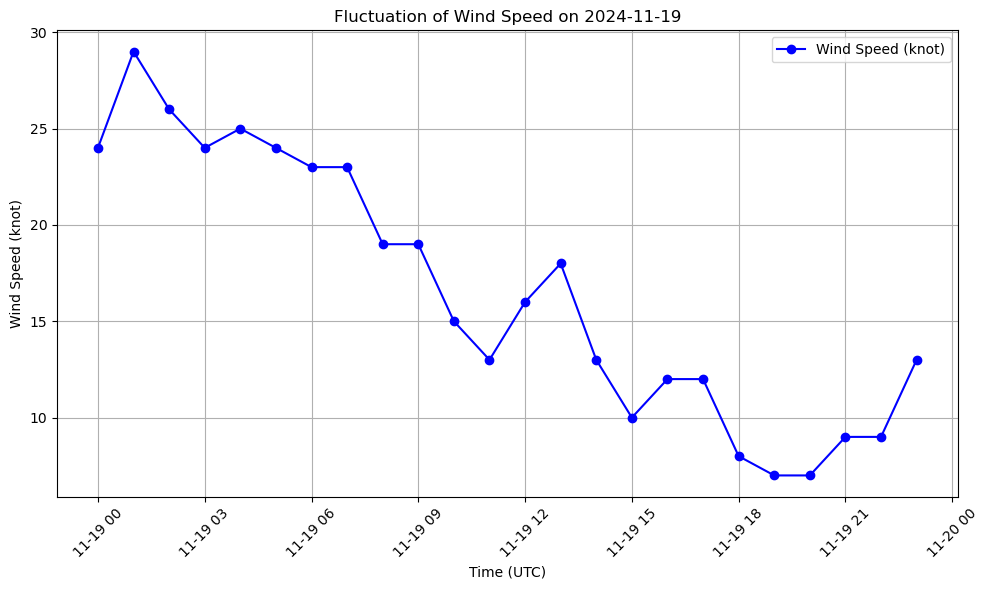

In [10]:
# Filter data for the specific date (19th November 2024)
specific_date = "2024-11-19"
filtered_data = df[df["Date and Time (UTC)"].dt.date == pd.to_datetime(specific_date).date()]

# Plot Wind Speed over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date and Time (UTC)"], filtered_data["Mean Wind Speed (knot)"], marker='o', color='blue', label="Wind Speed (knot)")
plt.xlabel("Time (UTC)")
plt.ylabel("Wind Speed (knot)")
plt.title(f"Fluctuation of Wind Speed on {specific_date}")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

I then created a plot of the windspeed over a week, using the week with the most recent data.

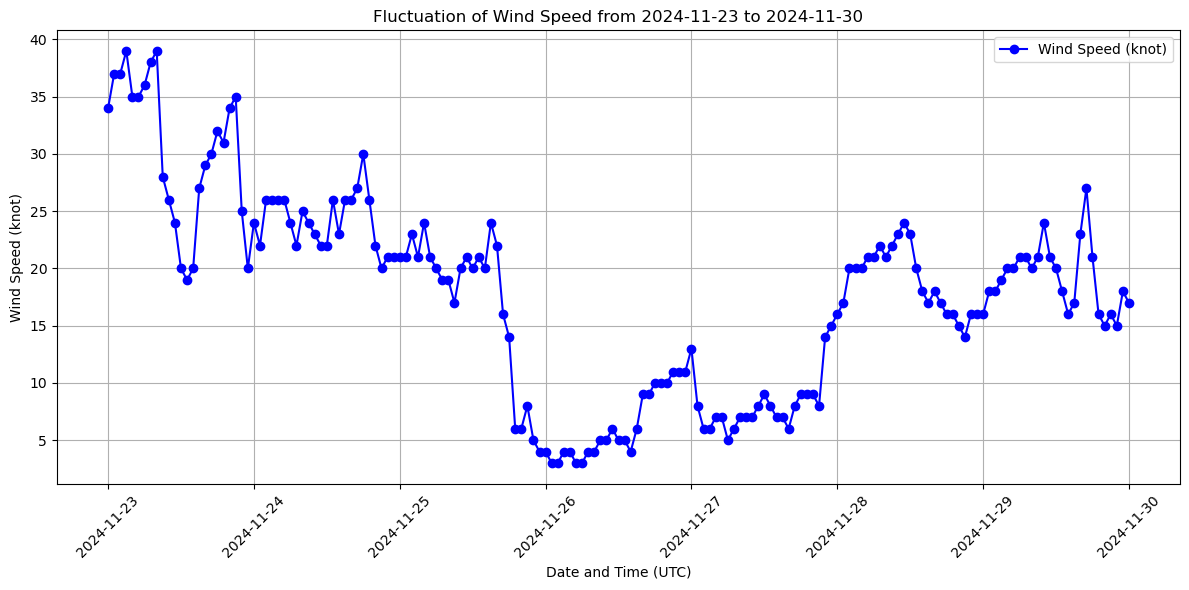

In [11]:
# date range
start_date = "2024-11-23"
end_date = "2024-11-30"

# Filter data
filtered_data = df[(df["Date and Time (UTC)"] >= pd.to_datetime(start_date)) & 
                   (df["Date and Time (UTC)"] <= pd.to_datetime(end_date))]

# Plot Wind Speed over week
plt.figure(figsize=(12, 6))
plt.plot(filtered_data["Date and Time (UTC)"], filtered_data["Mean Wind Speed (knot)"], marker='o', color='blue', label="Wind Speed (knot)")
plt.xlabel("Date and Time (UTC)")
plt.ylabel("Wind Speed (knot)")
plt.title(f"Fluctuation of Wind Speed from {start_date} to {end_date}")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
print(df.columns)

Index(['Date and Time (UTC)', 'Indicator 1', 'Precipitation Amount (mm)',
       'Indicator 2', 'Air Temperature (C)', 'Indicator 3',
       'Wet Bulb Temperature (C)', 'Dew Point Temperature (C)',
       'Vapour Pressure (hPa)', 'Relative Humidity (%)',
       'Mean Sea Level Pressure (hPa)', 'Indicator 4',
       'Mean Wind Speed (knot)', 'Indicator 5',
       'Predominant Wind Direction (degree)', 'Month', 'Date'],
      dtype='object')


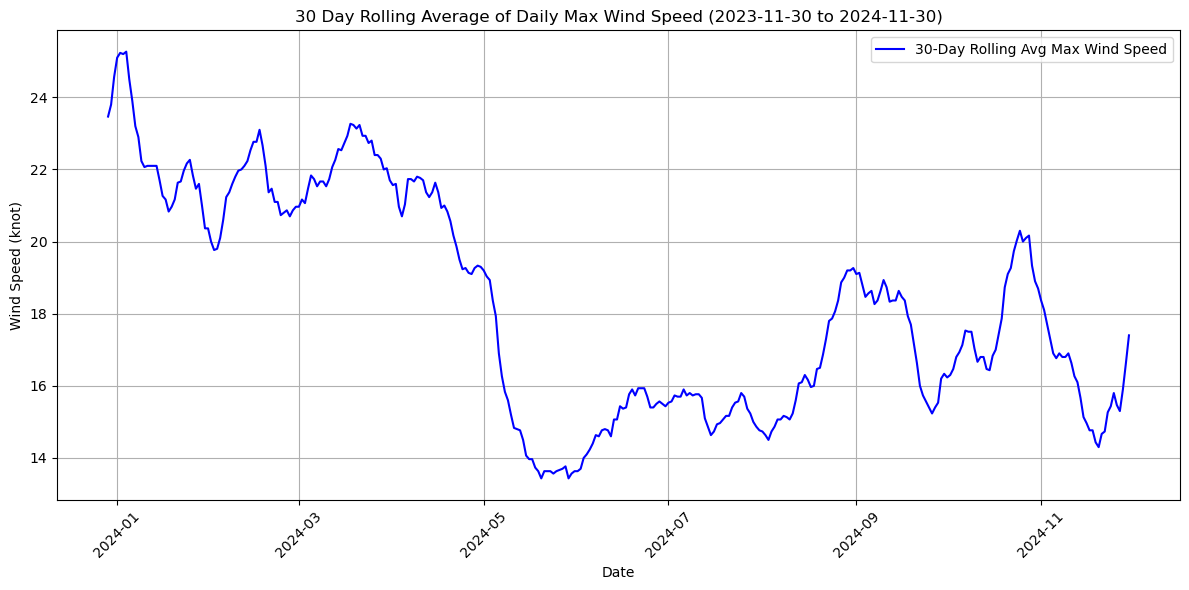

In [13]:
# Define date range
start_date = pd.to_datetime("2023-11-30").date()
end_date = pd.to_datetime("2024-11-30").date()

# filter using date column
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Get daily max wind speed
daily_max_wind = filtered_df.groupby("Date")["Mean Wind Speed (knot)"].max().reset_index()
daily_max_wind.rename(columns={"Mean Wind Speed (knot)": "Daily Max Wind Speed (knot)"}, inplace=True)

#Calculate 30 day rolling average 
daily_max_wind["Rolling Avg Max Wind Speed (knot)"] = daily_max_wind["Daily Max Wind Speed (knot)"].rolling(window=30).mean()

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wind["Date"], daily_max_wind["Rolling Avg Max Wind Speed (knot)"], color='blue', label="30-Day Rolling Avg Max Wind Speed")
plt.xlabel("Date")
plt.ylabel("Wind Speed (knot)")
plt.title(f"30 Day Rolling Average of Daily Max Wind Speed ({start_date} to {end_date})")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#https://robotwealth.com/rolling-and-expanding-windows-for-dummies/
#https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
#https://sparkbyexamples.com/pandas/pandas-filter-dataframe-rows-on-dates/


I created a Polar plot to determine the correlation between wind speed and wind direction. South Westerly winds are the most powerful. (Look at where the island is and if that is the side facing the atlantic) 

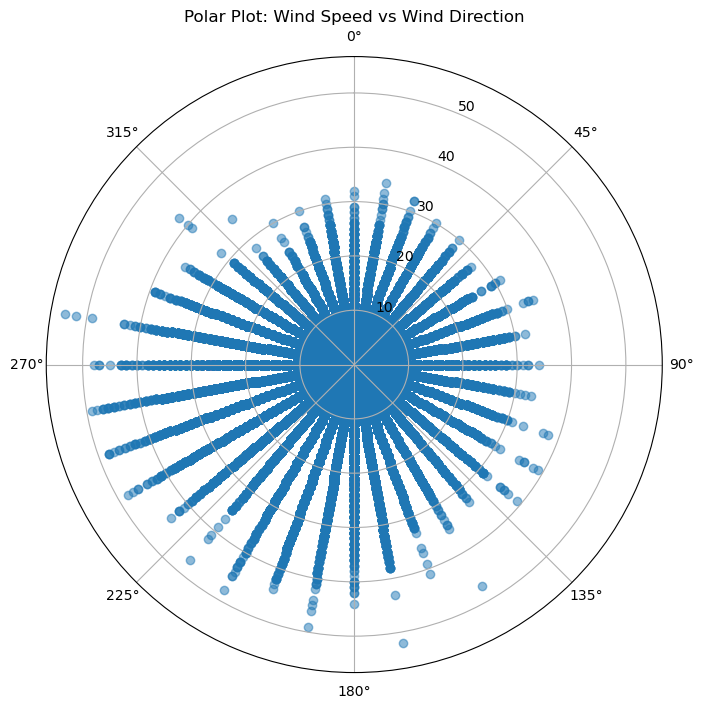

In [14]:
# Convert degrees to radians for polar plot
df["Wind Direction Radians"] = np.deg2rad(df["Predominant Wind Direction (degree)"])

# Create polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(df["Wind Direction Radians"], df["Mean Wind Speed (knot)"], alpha=0.5)
ax.set_theta_zero_location("N")  #North at the top
ax.set_theta_direction(-1)       # clockwise
ax.set_title("Polar Plot: Wind Speed vs Wind Direction")
plt.show()

# https://www.scaler.com/topics/matplotlib/polar-plot-matplotlib/
# https://www.codecademy.com/resources/docs/numpy/math-methods/deg2rad
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_scatter.html

Investigatig Storms

In [15]:
# thresholds
wind_speed_threshold = 45  # wind speed > 45 knots
precipitation_threshold = 10  # rain > 10 mm

# storms
storm_events = df[
    (df["Mean Wind Speed (knot)"] > wind_speed_threshold) |
    (df["Precipitation Amount (mm)"] > precipitation_threshold)
]

print(f"Number of potential storm events: {len(storm_events)}")

Number of potential storm events: 53


In [16]:
# count the storms
storm_days = storm_events.groupby("Date").size().reset_index(name="Storm Event Count")

# print
print(storm_days)

          Date  Storm Event Count
0   2007-11-17                  1
1   2007-12-09                  2
2   2008-01-09                  1
3   2008-07-29                  1
4   2009-01-17                  2
5   2011-09-30                  1
6   2012-08-15                  1
7   2012-08-28                  1
8   2012-11-20                  1
9   2013-09-28                  1
10  2013-12-27                  3
11  2014-02-08                  3
12  2014-02-12                  3
13  2014-07-18                  1
14  2015-12-30                  2
15  2016-02-08                  8
16  2016-07-09                  1
17  2016-08-01                  1
18  2017-07-18                  1
19  2017-10-16                  2
20  2019-08-08                  1
21  2019-10-01                  1
22  2019-12-08                  1
23  2020-08-15                  1
24  2020-09-02                  1
25  2021-10-08                  1
26  2021-12-07                  5
27  2022-09-05                  1
28  2023-09-24

In [17]:
#Looking at how strong the storms are
storm_severity = storm_events.groupby("Date").agg({
    "Mean Wind Speed (knot)": "max",  # Max wind speed
    "Precipitation Amount (mm)": "sum"  # Total precipitation
}).reset_index()

storm_severity.rename(columns={
    "Mean Wind Speed (knot)": "Max Wind Speed (knot)",
    "Precipitation Amount (mm)": "Total Precipitation (mm)"
}, inplace=True)

print(storm_severity)


          Date  Max Wind Speed (knot)  Total Precipitation (mm)
0   2007-11-17                   18.0                      13.8
1   2007-12-09                   48.0                       1.8
2   2008-01-09                   25.0                      10.1
3   2008-07-29                   11.0                      12.7
4   2009-01-17                   49.0                       2.5
5   2011-09-30                   15.0                      11.4
6   2012-08-15                   22.0                      10.6
7   2012-08-28                   22.0                      15.4
8   2012-11-20                   13.0                      10.4
9   2013-09-28                   13.0                      10.8
10  2013-12-27                   47.0                       0.1
11  2014-02-08                   48.0                       1.0
12  2014-02-12                   54.0                       1.4
13  2014-07-18                    7.0                      11.1
14  2015-12-30                   48.0   

Mention that you googled some of the dates above to find some of the biggest storms ie. storm Ophelia.
Explain what speed in km/hr 40 knots is.

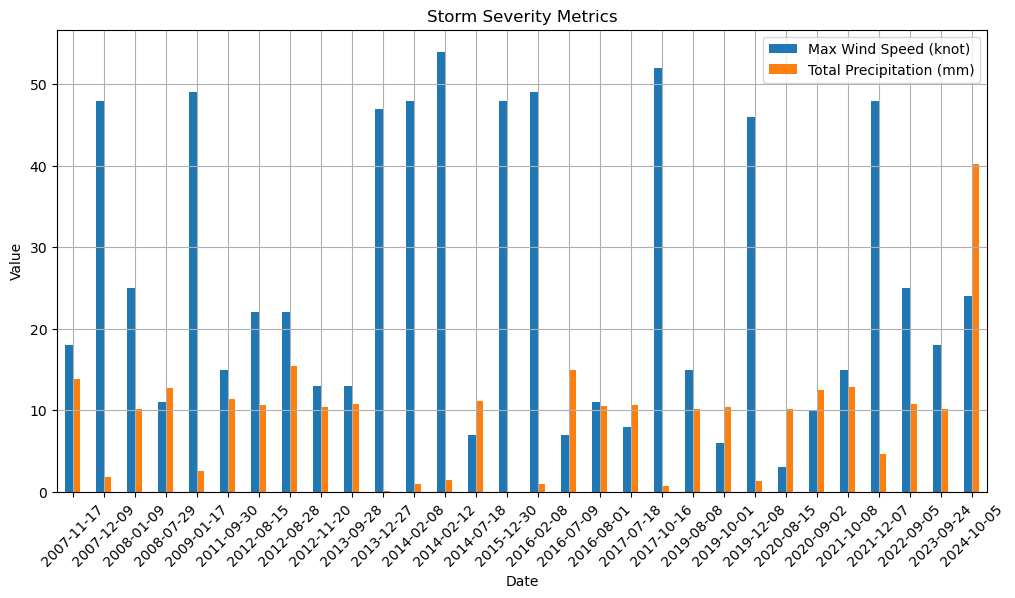

In [18]:
#plot it
storm_severity.plot(
    x="Date", 
    y=["Max Wind Speed (knot)", "Total Precipitation (mm)"], 
    kind="bar",
    figsize=(12, 6),
    title="Storm Severity Metrics"
)
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.grid()
plt.show()

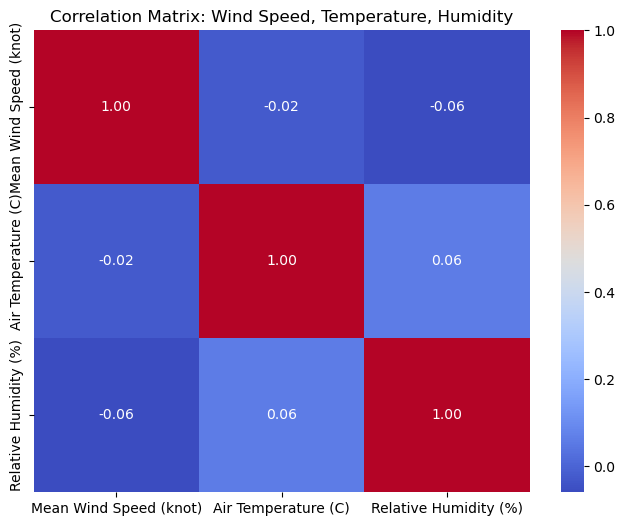

In [19]:
#Measuring the variable interdependance - is there any correlation between windspeed, humidity and temperature
# Filter dates
start_date = pd.to_datetime("2020-11-30").date()
end_date = pd.to_datetime("2024-11-30").date()
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


correlation_data = filtered_df[["Mean Wind Speed (knot)", "Air Temperature (C)", "Relative Humidity (%)"]]

# Make the correlation matrix
correlation_matrix = correlation_data.corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Wind Speed, Temperature, Humidity")
plt.show()

#https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp
#https://www.datacamp.com/tutorial/seaborn-heatmaps
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

C:\Users\aoife.000\AppData\Local\Temp\ipykernel_23400\1518610634.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Season"] = filtered_df["Date and Time (UTC)"].dt.month.apply(get_season)


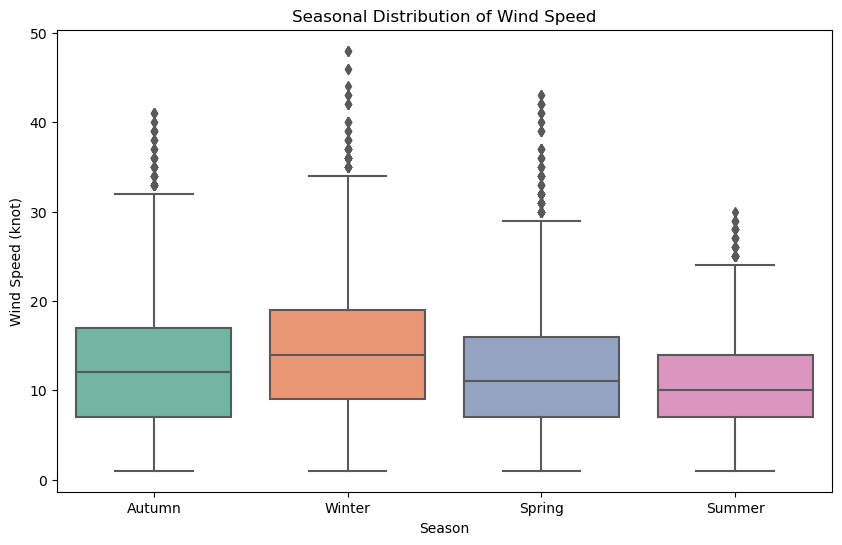

In [20]:
# make a season column
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

filtered_df["Season"] = filtered_df["Date and Time (UTC)"].dt.month.apply(get_season)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x="Season", y="Mean Wind Speed (knot)", palette="Set2")
plt.title("Seasonal Distribution of Wind Speed")
plt.xlabel("Season")
plt.ylabel("Wind Speed (knot)")
plt.show()

#https://www.geeksforgeeks.org/types-of-seaborn-plots/
#https://www.datacamp.com/tutorial/python-boxplots


Slope: 0.0274
P-value: 0.2547
R-squared: 0.0714


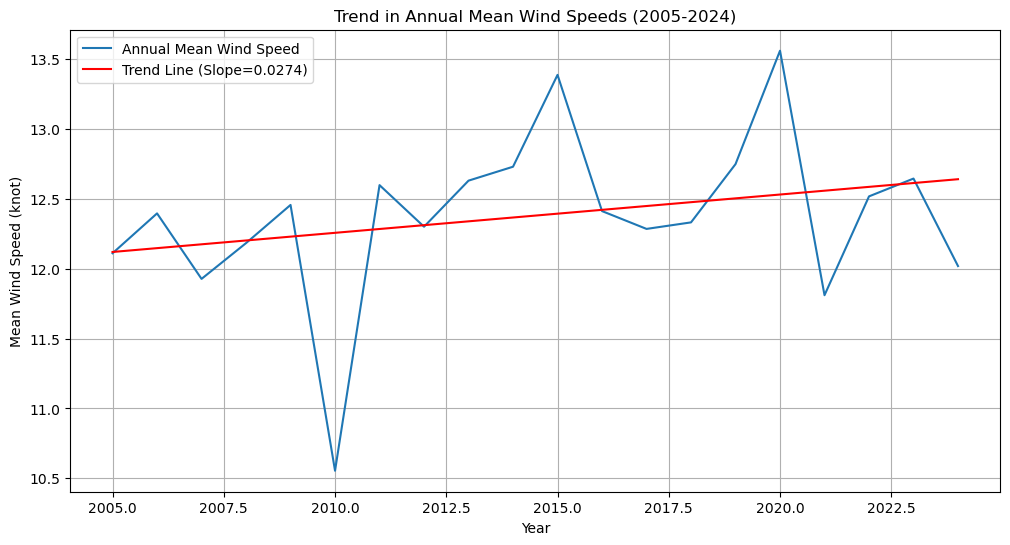

In [21]:
# set dates
start_date = pd.to_datetime("2005-01-01").date()
end_date = pd.to_datetime("2024-11-30").date()

# date range
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# make a copy
filtered_df = filtered_df.copy()

# Make a year column
filtered_df['Year'] = filtered_df['Date and Time (UTC)'].dt.year
# average mean windspeed
filtered_df['Year'] = filtered_df['Date and Time (UTC)'].dt.year
annual_mean_wind_speed = filtered_df.groupby('Year')['Mean Wind Speed (knot)'].mean().reset_index()

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    annual_mean_wind_speed['Year'], 
    annual_mean_wind_speed['Mean Wind Speed (knot)']
)

# results
print(f"Slope: {slope:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# plot it
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_mean_wind_speed, x="Year", y="Mean Wind Speed (knot)", label="Annual Mean Wind Speed")
plt.plot(
    annual_mean_wind_speed["Year"], 
    intercept + slope * annual_mean_wind_speed["Year"], 
    color="red", label=f"Trend Line (Slope={slope:.4f})"
)
plt.title("Trend in Annual Mean Wind Speeds (2005-2024)")
plt.xlabel("Year")
plt.ylabel("Mean Wind Speed (knot)")
plt.legend()
plt.grid()
plt.show()

#https://stackoverflow.com/questions/58909624/what-is-the-use-of-reset-index-in-pandas
#https://www.w3schools.com/python/pandas/ref_df_reset_index.asp
#https://realpython.com/linear-regression-in-python/
#https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/

Slope:
If the slope is significantly different from zero (check 
p
p-value), it indicates a trend in wind speeds over time.


P-value:
A 
p
p-value less than 0.05 suggests that the trend is statistically significant.


R-squared:
The 
R
2
R 
2
  value indicates how well the linear model explains the variation in wind speeds over time. A higher value means a better fit.

Explanation of Results
From your regression analysis:
Slope: 
0.0274
0.0274 suggests a slight upward trend in wind speeds over time.


P-value: 
0.2547
0.2547, which is greater than 
0.05
0.05, indicates that this trend is not statistically significant.


R-squared: 
0.0714
0.0714 means only 7.14% of the variation in wind speeds is explained by the regression model, suggesting a weak relationship.


Given these results, there is no strong evidence of a significant trend in wind speeds over the analyzed period. Wind speeds are likely to remain relatively stable over time based on this analysis.